# Analysis of Superstore Database

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [30]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [31]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["City"].unique())
print(df["State"].unique())
print(df["Region"].unique())
print(df["Sub-Category"].unique())
print(df["Sales"].unique())
print(df["Quantity"].unique())
print(df["Discount"].unique())
print(df["Profit"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel 

In [6]:
df.Country.nunique()

1

In [7]:
df.drop(columns = 'Country')

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


    We can say that the whole data set is for the sales of superstore in United States hence we can remove the column.

In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
!pip install plotly matplotlib seaborn --quiet

In [10]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Is there any difference in aggregate sales across regions?**

In [11]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


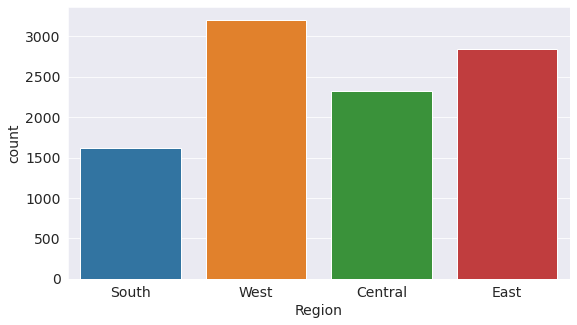

In [12]:
sns.countplot(df['Region']);

**Which is the most pouplar category product used by customers ?**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

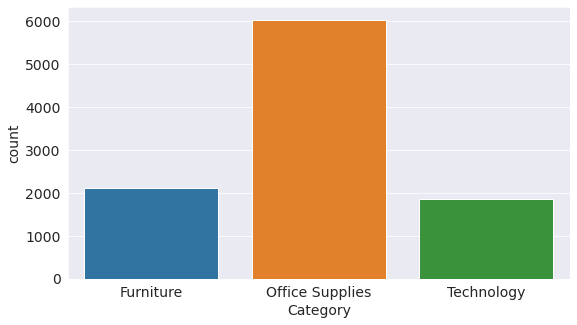

In [13]:
sns.countplot(df['Category'])

**PRODUCT QUANTITY WITH RESPECT TO SUB CATEGORY ?**

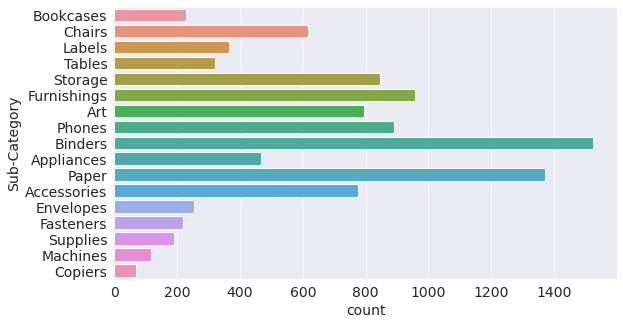

In [14]:
sns.countplot(data = df , y = 'Sub-Category');

**Which category is most profitable ?**

<AxesSubplot:xlabel='Category', ylabel='Profit'>

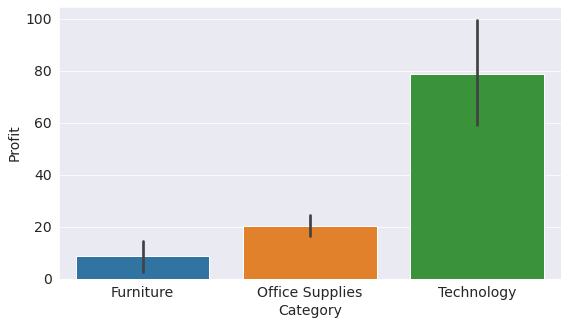

In [15]:
sns.barplot(x='Category', y='Profit', data=df)

**Correlation**

<AxesSubplot:>

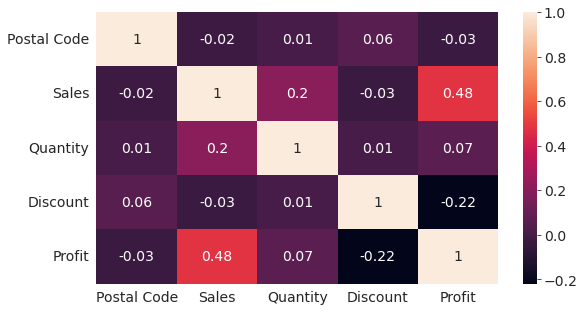

In [16]:
sns.heatmap(np.round(df.corr(),2), annot=True)


**Which city is selling the products with most profit ?**

In [17]:
ndf = df.groupby('State')[['Profit']].mean()

In [18]:
ndf=ndf.reset_index(['State']).sort_values('Profit' , ascending = False).head(5)

<AxesSubplot:xlabel='Profit', ylabel='State'>

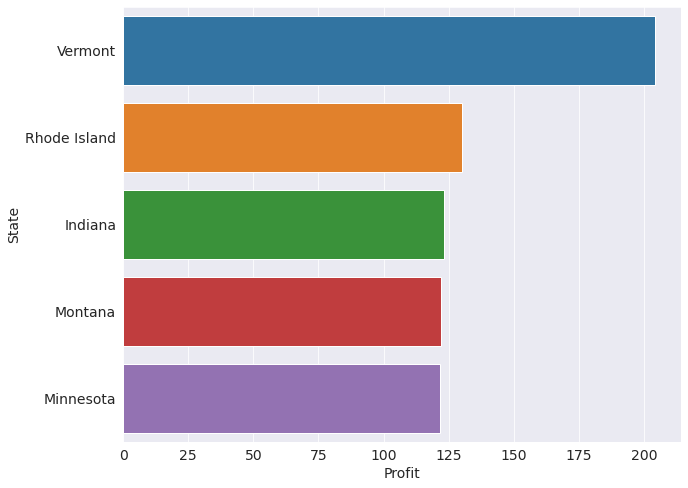

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x='Profit', y='State', data=ndf)

**Which shipping mode has highest quantity ?**

In [20]:
kdf = df.groupby('Ship Mode')[['Quantity']].sum()

In [21]:
kdf=kdf.reset_index(['Ship Mode'])

In [22]:
kdf

,Ship Mode,Quantity
0,First Class,5693
1,Same Day,1960
2,Second Class,7423
3,Standard Class,22797


<AxesSubplot:xlabel='Ship Mode', ylabel='Quantity'>

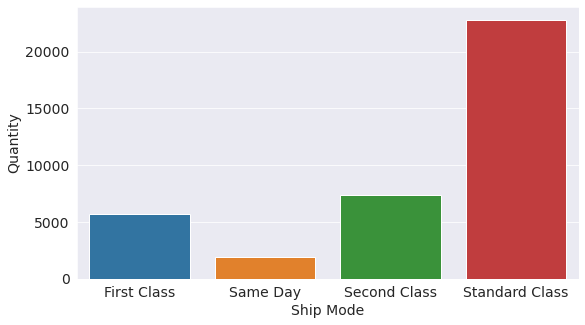

In [23]:
sns.barplot(x='Ship Mode' , y = 'Quantity' , data = kdf)

**WHICH CATEGORY PRODUCT IS MOSTLY PURCHASED BY WHICH SEGMENT OF CUSTOMERS ?**

In [24]:
sdf = df.groupby(['Segment','Category'])[['Quantity']].sum()

In [25]:
sdf

Quantity
Segment     Category                 
Consumer    Furniture            4166
            Office Supplies     11758
            Technology           3597
Corporate   Furniture            2495
            Office Supplies      7018
            Technology           2095
Home Office Furniture            1367
            Office Supplies      4130
            Technology           1247

In [26]:
sdf = sdf.reset_index(['Segment' , 'Category'])

In [27]:
sdf

,Segment,Category,Quantity
0,Consumer,Furniture,4166
1,Consumer,Office Supplies,11758
2,Consumer,Technology,3597
3,Corporate,Furniture,2495
4,Corporate,Office Supplies,7018
5,Corporate,Technology,2095
6,Home Office,Furniture,1367
7,Home Office,Office Supplies,4130
8,Home Office,Technology,1247


<AxesSubplot:xlabel='Segment', ylabel='Quantity'>

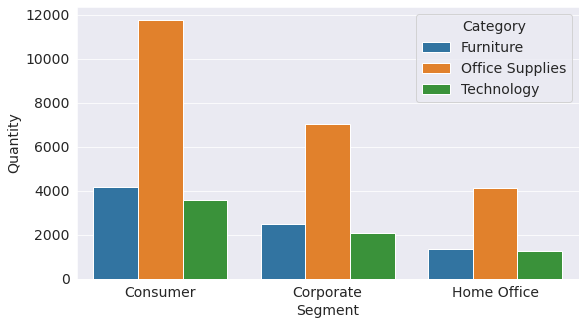

In [28]:
sns.barplot(x='Segment' , y='Quantity' , hue = 'Category' , data=sdf)